## Import Libraries

In [52]:
import numpy as np
np.random.seed(0)
import pandas as pd
from keras.models import Sequential
from keras import initializers
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from keras import optimizers
from sklearn.model_selection import train_test_split
import cv2
import os
import random
from glob import glob
import seaborn as sns

## Data Exploration

In [35]:
# ../input/
PATH = os.path.abspath(os.path.join('input'))

# ../input/sample/images/
SOURCE_IMAGES = os.path.join(PATH, "sample", "images")

# ../input/sample/images/*.png
images = glob(os.path.join(SOURCE_IMAGES, "*.png"))

# Load labels
labels = pd.read_csv('input/sample_labels.csv')

In [36]:
labels.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,0.168
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,0.168
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,0.143
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,0.168


In [38]:
images[0:5]

['/Users/paulinazheng/code/flatiron/mod4/chest_xrays/input/sample/images/00018805_001.png',
 '/Users/paulinazheng/code/flatiron/mod4/chest_xrays/input/sample/images/00011723_001.png',
 '/Users/paulinazheng/code/flatiron/mod4/chest_xrays/input/sample/images/00025380_000.png',
 '/Users/paulinazheng/code/flatiron/mod4/chest_xrays/input/sample/images/00008211_000.png',
 '/Users/paulinazheng/code/flatiron/mod4/chest_xrays/input/sample/images/00003459_017.png']

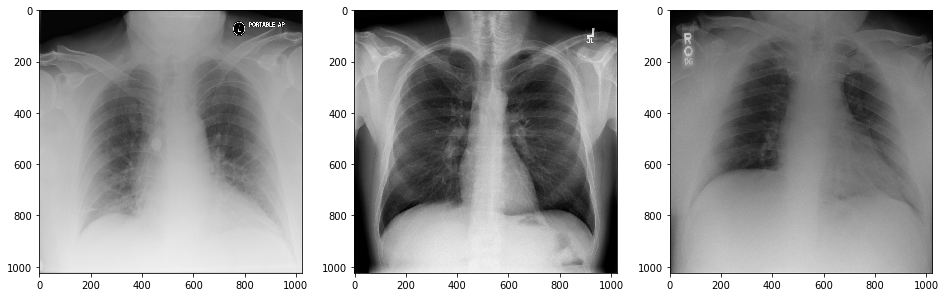

In [37]:
r = random.sample(images, 3)
r

plt.figure(figsize=(16,16))
plt.subplot(131)
plt.imshow(cv2.imread(r[0]))

plt.subplot(132)
plt.imshow(cv2.imread(r[1]))

plt.subplot(133)
plt.imshow(cv2.imread(r[2]))

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
5541,00030209_008.png,Infiltration,8,30209,010Y,M,AP,3056,2544,0.139,0.139


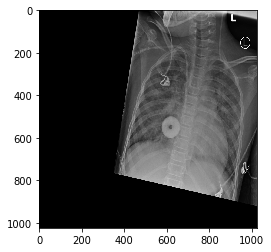

In [39]:
e = cv2.imread(os.path.join(SOURCE_IMAGES,'00030209_008.png'))

plt.imshow(e)

labels[labels["Image Index"] == '00030209_008.png']

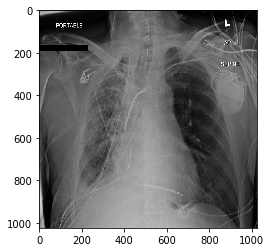

In [49]:
disease=['Hernia', 'Pneumonia', 'Fibrosis', 'Edema', 'Emphysema', 'Cardiomegaly', 'Pleural_Thickening',
        'Consolidation', 'Pneumothorax', 'Mass', 'Nodule', 'Atelectasis', 'Effusion', 'Infiltration',
        'No Finding']

e = cv2.imread(os.path.join(SOURCE_IMAGES,'00000013_005.png'))

plt.imshow(e)

label = labels[labels["Image Index"] == '00000013_005.png']
# label
# base = os.path.basename(img)
# finding = labels["Finding Labels"][labels["Image Index"] == base].values[0]
# result = finding.split('|')

        
    

In [ ]:
#Drop multiple 
#Regroup rare 
#Data augmentation for every image in rare class

### Data Visualization

In [57]:
df=labels
data=df.groupby('Finding Labels').count().sort_values('Patient ID',ascending=False)
df1=data[['|' in index for index in data.index]].copy()
df2=data[['|' not in index for index in data.index]]
df2.head()

,Image Index,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
Finding Labels,,,,,,,,,,
No Finding,3044,3044,3044,3044,3044,3044,3044,3044,3044,3044
Infiltration,503,503,503,503,503,503,503,503,503,503
Effusion,203,203,203,203,203,203,203,203,203,203
Atelectasis,192,192,192,192,192,192,192,192,192,192
Nodule,144,144,144,144,144,144,144,144,144,144


In [ ]:
#Plot distribution of diseases by sex and overall, before grouping

In [ ]:
#Plot distribution of single vs multiple diseases

In [ ]:
#Box plot of patient age and disease 

### Data Cleaning & Image Resizing

In [55]:
#drop multiple labels
print(labels.columns)

Index(['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImageWidth',
       'OriginalImageHeight', 'OriginalImagePixelSpacing_x',
       'OriginalImagePixelSpacing_y'],
      dtype='object')

In [66]:
def proc_images():
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """
    
    NoFinding = "No Finding" #0
    Consolidation="Consolidation" #1
    Infiltration="Infiltration" #2
    Pneumothorax="Pneumothorax" #3
    Effusion="Effusion" #4
    NoduleMass="Nodule" #5
    Atelectasis="Atelectasis"  #6 
    RareClass = ["Edema", "Emphysema", "Fibrosis", "Pneumonia", "Pleural_Thickening", "Cardiomegaly","Hernia"] #7

    x = [] # images as arrays
    y = [] # labels disease
    WIDTH = 128
    HEIGHT = 128

    for img in images:
        base = os.path.basename(img)
        finding = labels["Finding Labels"][labels["Image Index"] == base].values[0]

        # Read and resize image
        full_size_image = cv2.imread(img)
        symbol = '|'
        if symbol in finding:
            continue    
        # Labels
        else:
            if NoFinding in finding:
                finding = 0
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif Consolidation in finding:
                finding = 1 
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif Infiltration in finding:
                finding = 2
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif Pneumothorax in finding:
                finding = 3
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif Effusion in finding:
                finding = 4
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif NoduleMass in finding:
                finding = 5
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif Atelectasis in finding:
                finding = 6
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif finding in RareClass:
                finding = 7
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            else:
                continue
    return x,y

In [88]:
x_vals, y_vals = proc_images()

In [70]:
y

[0,
 0,
 0,
 0,
 2,
 7,
 0,
 0,
 0,
 2,
 2,
 2,
 7,
 0,
 3,
 0,
 0,
 0,
 6,
 0,
 0,
 2,
 0,
 6,
 7,
 0,
 1,
 5,
 0,
 5,
 0,
 0,
 5,
 0,
 6,
 0,
 0,
 0,
 7,
 5,
 0,
 5,
 4,
 0,
 6,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 6,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 7,
 0,
 0,
 0,
 0,
 0,
 0,
 7,
 2,
 0,
 7,
 0,
 2,
 0,
 6,
 2,
 0,
 7,
 0,
 0,
 0,
 3,
 0,
 7,
 2,
 7,
 0,
 0,
 0,
 7,
 7,
 7,
 0,
 0,
 0,
 7,
 2,
 0,
 0,
 7,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 7,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 1,
 3,
 0,
 0,
 0,
 0,
 7,
 0,
 0,
 0,
 6,
 0,
 0,
 4,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 6,
 2,
 4,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 4,
 6,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 7,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 7,
 6,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 6,
 0,
 0,
 0,
 5,


In [78]:
df = pd.DataFrame()
df["labels"]=y_vals
df["images"]=x_vals
check=df.groupby('labels').count()
print(len(df))
check

4527


,images
labels,
0,3044
1,72
2,503
3,114
4,203
5,144
6,192
7,255


In [77]:
#Plot distribution of diseases, after grouping

In [79]:
print(len(df), df.images[0].shape)

4527 (128, 128, 3)


In [80]:
np.savez("x_images_arrays", x_vals)
np.savez("y_disease_labels", y_vals)

### Load Data

In [90]:
# Load npz file containing image arrays
x_npz = np.load("x_images_arrays.npz")
x = x_npz['arr_0']
# Load binary encoded labels for Lung Infiltrations: 0=Not_infiltration 1=Infiltration
y_npz = np.load("y_disease_labels.npz")
y = y_npz['arr_0']
x

array([[[[ 21,  21,  21],
         [  3,   3,   3],
         [  0,   0,   0],
         ...,
         [  1,   1,   1],
         [  1,   1,   1],
         [  2,   2,   2]],

        [[ 20,  20,  20],
         [  3,   3,   3],
         [  0,   0,   0],
         ...,
         [  1,   1,   1],
         [  1,   1,   1],
         [  2,   2,   2]],

        [[ 21,  21,  21],
         [  2,   2,   2],
         [  0,   0,   0],
         ...,
         [  1,   1,   1],
         [  1,   1,   1],
         [  2,   2,   2]],

        ...,

        [[ 11,  11,  11],
         [  5,   5,   5],
         [  5,   5,   5],
         ...,
         [  0,   0,   0],
         [  1,   1,   1],
         [ 10,  10,  10]],

        [[ 34,  34,  34],
         [ 31,  31,  31],
         [ 30,  30,  30],
         ...,
         [  7,   7,   7],
         [  9,   9,   9],
         [ 24,  24,  24]],

        [[ 90,  90,  90],
         [ 98,  98,  98],
         [ 91,  91,  91],
         ...,
         [ 28,  28,  28],
        

### Data Augmentation

In [ ]:
#Data Augmentation

### Train, Test, Split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [99]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3621, 128, 128, 3)
(906, 128, 128, 3)
(3621,)
(906,)


In [100]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [101]:
X_train /= 255
X_test /= 255

In [ ]:
#one-hot encode y_train & y_test
y_train = keras.utils.to_categorical(y_train, 8)
y_test = keras.utils.to_categorical(y_test, 8)

### Hyperparameter Log

In [ ]:
#Attempt 1
epochs
sgd = optimizers.SGD(lr=0.03, decay=0.0001, momentum=0.9)
optimizer
batch_size
loss

### MLP

In [ ]:
#Attempt 1 
model = Sequential()
model.add(Dense(8, input_dim=12, activation='relu'))
model.add(Dense(1, activation='linear'))

### CNN